# Workshop: Anomaly detection from sensor data
Course: NICF- Intelligent Sensing and Sense Making (SF)

Website: https://www.iss.nus.edu.sg/executive-education/course/detail/intelligent-sensing-and-sense-making/analytics-and-intelligent-systems

Contact: Tian Jing

Email: tianjing@nus.edu.sg

## Installation guideline (Colab)

[Last test on 27 August 2019] All required libraries have been installed in Colab.

## Objective
In this workshop, we will perform following three tasks:

- Introduction to autoencoder model and Keras
- Perform anomaly detection using autoencoder as reconstruction model

## Submission guideline
Once you finish the workshop, rename your .ipynb file to your name, and submit your .ipynb file into LumiNUS.

In [1]:
# Check GPU setup in Colab

import tensorflow as tf
tf.test.gpu_device_name()

# Your expected output will be '/device:GPU:0'

'/device:GPU:0'

In [2]:
# Check GPU coinfiguration in Colab (T4 GPU)

!/opt/bin/nvidia-smi

Tue Aug 27 06:22:31 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    73W / 149W |     69MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
import os
import numpy as np
import keras
import pickle
import pandas as pd
from keras.utils import plot_model
from keras.datasets import fashion_mnist
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Input
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [4]:
# Then you’ll see a link, click on that link, allow access
# Copy the code that pops up, paste it in the box, hit enter

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
# Change working directory to be current folder

os.chdir('/content/gdrive/My Drive/issm/day3')
!ls


data  wk_abnormal_colab_v4.0.ipynb


In [0]:
# Configuration on autoencoder model

# Dimension of input signal, determined by your test data
signal_dimension = 784 

# Dimension of encoded features, can be adjusted by user
encoder_dimension = 2

# training setup
EPOCHS = 5
BATCH_SIZE = 64


In [0]:
# Define an autoencoder model using Sequential method

def AE_method1(x_train):
    FINAL_DIM = 900
    data_dim = data_train.shape[1]
    autoencoder = Sequential()
    autoencoder.add(Dense(encoder_dimension, activation='relu', input_shape=(signal_dimension, ), name='layer1'))
    autoencoder.add(Dense(signal_dimension, activation='relu',name='layer2'))
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.fit(x_train, x_train, epochs=EPOCHS, batch_size=BATCH_SIZE, shuffle=True)
    
    encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('layer1').output)
    return encoder, autoencoder

In [0]:
# Show the encoding coefficients

def show_encodings(inputs, latent_repr, outputs):
    n = len(inputs)
    fig, axes = plt.subplots(2, n)
    for i in range(n):
        print(i, '-th image, encoding coefficients are ', latent_repr[i,:])
        axes[0, i].imshow(inputs[i].reshape(28, 28), cmap='gray')
        axes[1, i].imshow(outputs[i].reshape(28, 28), cmap='gray')
    for ax in axes.flatten():
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

4423680/4422102 [==============================] - 2s 0us/step
(60000, 28, 28) (10000, 28, 28)


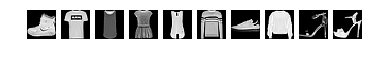

In [9]:
# For the first time of running this code, it will automatically download fashion_mnist data from Internet
# Load data
(data_train, label_train), (data_test, label_test) = fashion_mnist.load_data()
print(data_train.shape, data_test.shape)

# Normalize
data_train = data_train.astype('float32') / 255.
data_test = data_test.astype('float32') / 255.

# Plot the examples of original images
fig, ax = plt.subplots(1, 10)
for i in range(10):
    ax[i].imshow(data_train[i], cmap='gray')
    ax[i].axis('off')

plt.show()

data_train = data_train.reshape((data_train.shape[0], -1))
data_test = data_test.reshape((data_test.shape[0], -1))

In [10]:
# Demo autoencoder using method 1 (Sequential method)

model_encoder, model_autoencoder = AE_method1(x_train=data_train)
model_encoder.summary()
model_autoencoder.summary()

W0827 06:23:09.707733 140107429205888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 06:23:09.712683 140107429205888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 06:23:09.725280 140107429205888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0827 06:23:09.755862 140107429205888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0827 06:23:09.913814 140107429205888 deprecation_wrappe

Epoch 1/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.1373
Epoch 2/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.1349
Epoch 3/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.1348
Epoch 4/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.1348
Epoch 5/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.1348
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1_input (InputLayer)    (None, 784)               0         
_________________________________________________________________
layer1 (Dense)               (None, 2)                 1570      
Total params: 1,570
Trainable params: 1,570
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape   

0 -th image, encoding coefficients are  [0.        0.8579804]
1 -th image, encoding coefficients are  [0.        7.9960914]
2 -th image, encoding coefficients are  [0.        5.5273385]
3 -th image, encoding coefficients are  [0.     4.0465]
4 -th image, encoding coefficients are  [0.       4.706299]
5 -th image, encoding coefficients are  [0.        5.3072314]


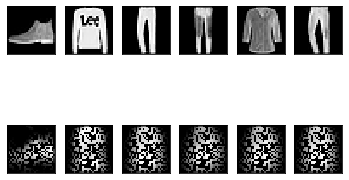

In [11]:
# Visualize the results and encoding coefficients

num_sample = 6 # Number of test samples used for visualization
data_encode = model_encoder.predict(data_test[:num_sample])

data_rec = model_autoencoder.predict(data_test)
show_encodings(data_test[:num_sample], data_encode, data_rec)

In [0]:
# Define an autoencoder model using Functional method

def AE_method2(x_train):
    # input placeholder
    input_image = Input(shape=(signal_dimension, ))

    # encoding layer
    hidden_layer = Dense(encoder_dimension, activation='relu')(input_image)

    # decoding layer
    decode_output = Dense(signal_dimension, activation='relu')(hidden_layer)

    # build autoencoder, encoder, decoder
    encoder = Model(inputs=input_image, outputs=hidden_layer)
    autoencoder = Model(inputs=input_image, outputs=decode_output)

    # compile autoencoder
    autoencoder.compile(optimizer='adam', loss='mse')

    # training
    autoencoder.fit(x_train, x_train, epochs=EPOCHS, batch_size=BATCH_SIZE, shuffle=True)

    return encoder, autoencoder

$\color{red}{\text{Q1. Complete the code to build autoencoder model and visualize the encoding coefficients.}}$

Tasks

- Build an autoencoder model using `AE_method2()`
- Plot the model summary
- Perform prediction using the first 5 test samples
- Visualize the original sample, encoding coefficients, reconstructed sample

In [0]:
# Provide your solution to Q1 here
#
#
#
#

# Exercise 2: Machine health monitoring

- Reference: R. Zhao, R. Yan, Z. Chen, K. Mao, P. Wang, R. Gao, Deep learning and its applications to machine health monitoring, Mechanical Systems and Signal Processing, Vol. 115, Jan. 2019, pp. 213-237.

- pdf paper, https://arxiv.org/abs/1612.07640
- code, https://github.com/ClockworkBunny/MHMS_DEEPLEARNING

In [0]:
# Configuration
encoder_dimension = 10
NUM_EPOCH = 10
BATH_SIZE = 24

In [0]:
# Define an autoencoder model using Sequantial method

def build_AE_machine(data_train):
    data_dim = data_train.shape[1]
    ae = Sequential()
    ae.add(Dense(encoder_dimension, activation='relu', input_shape=(data_dim, )))
    ae.add(Dense(encoder_dimension, activation='relu'))
    ae.add(Dense(data_dim, activation='relu'))
    ae.compile(optimizer='adam', loss='mse')
    ae.fit(data_train, data_train, epochs=NUM_EPOCH, batch_size=BATH_SIZE, shuffle=True)
    
    return ae

In [16]:
# Load data 
x_train_pd = pd.read_csv("data/machine_sensor_train.csv",header=None)
x_train = x_train_pd.values
x_test_pd = pd.read_csv("data/machine_sensor_test.csv",header=None)
x_test = x_test_pd.values

# Train the model
normal_AE = build_AE_machine(x_train)
normal_AE.summary()

Epoch 1/10
600/600 [==============================] - 0s 551us/step - loss: 0.4659
Epoch 2/10
600/600 [==============================] - 0s 176us/step - loss: 0.4512
Epoch 3/10
600/600 [==============================] - 0s 184us/step - loss: 0.4506
Epoch 4/10
600/600 [==============================] - 0s 173us/step - loss: 0.4500
Epoch 5/10
600/600 [==============================] - 0s 165us/step - loss: 0.4489
Epoch 6/10
600/600 [==============================] - 0s 169us/step - loss: 0.4474
Epoch 7/10
600/600 [==============================] - 0s 176us/step - loss: 0.4465
Epoch 8/10
600/600 [==============================] - 0s 175us/step - loss: 0.4462
Epoch 9/10
600/600 [==============================] - 0s 163us/step - loss: 0.4461
Epoch 10/10
600/600 [==============================] - 0s 165us/step - loss: 0.4460
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1

In [17]:
sample_index = 0
thre = 10 # A manually-defined threshold

# Step 1: Select the test sample (such as the 0-th sample)
test_data_orig = x_test[sample_index:sample_index+1,:]
print(test_data_orig.shape)

# Step 2: Perform prediction using the trained autoencoder model
test_data_predict = normal_AE.predict(test_data_orig)

# Step 3: Calculate the reconstruction error and make decision on anomaly detection
dist = np.linalg.norm(test_data_orig - test_data_predict, axis=-1)

if (dist>thre):
    print('Anomaly detected: the distance is %.2f' % dist)
else:
    print('Normal: the distance is %.2f' % dist)
    

(1, 70)
Normal: the distance is 6.73


$\color{red}{\text{Q2. Complete the code to build autoencoder model for abnormal machine sensory signal detection.}}$

Tasks

- Build an autoencoder model using build_AE_machine()
- Peform the test on x_test and determine the test data (row index) with LARGEST reconstruction error based on your trained model

In [0]:
# Provide your solution to Q2 here

**Once you finish the workshop, rename your .ipynb file to your name, and submit your .ipynb file into LumiNUS.**

Have a nice day!